# PREPARATION

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


# 1. Data Wrangling

## 1.1 Gathering Data

In [143]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
url = "https://media.githubusercontent.com/media/aurisarbn/CreditRisk/refs/heads/main/loan_data_2007_2014.csv"
dataset= pd.read_csv(url)
dataset

/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/1996282215.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv(url)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [145]:
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Assesing Data

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
columns_to_keep = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code',
    'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'
]

dataset_cleaned = dataset[columns_to_keep]

In [ ]:
print(dataset_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   sub_grade                466285 non-null  object 
 8   emp_title                438697 non-null  object 
 9   emp_length               445277 non-null  object 
 10  home_ownership           466285 non-null  object 
 11  annual_inc               466281 non-null  float64
 12  verification_status      466285 non-null  object 
 13  issue_d                  466285 non-null  object 
 14  loan

In [149]:
col_cat = dataset.select_dtypes(include='object')
col_num = dataset.select_dtypes(exclude='object')

In [150]:
col_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [151]:
col_cat.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


## 1.2.2 Checking Missing Value

In [152]:
dataset_cleaned.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                  27588
emp_length                 21008
home_ownership                 0
annual_inc                     4
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                   29
inq_last_6mths                29
open_acc                      29
pub_rec                       29
revol_bal                      0
revol_util                   340
total_acc                     29
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

In [153]:
# Menghapus semua baris yang memiliki missing values di salah satu kolom
df_cleaned = dataset_cleaned.dropna()

In [154]:
df_cleaned.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

## 1.2.3 Checking for Duplicates

In [155]:
print("Number of Duplicates: ", df_cleaned.duplicated().sum())
print("Sample Size:", len(df_cleaned))

Number of Duplicates:  0
Sample Size: 437863


# Exploratory Data Analysis (EDA)

In [156]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437863 entries, 1 to 466283
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                437863 non-null  int64  
 1   funded_amnt              437863 non-null  int64  
 2   funded_amnt_inv          437863 non-null  float64
 3   term                     437863 non-null  object 
 4   int_rate                 437863 non-null  float64
 5   installment              437863 non-null  float64
 6   grade                    437863 non-null  object 
 7   sub_grade                437863 non-null  object 
 8   emp_title                437863 non-null  object 
 9   emp_length               437863 non-null  object 
 10  home_ownership           437863 non-null  object 
 11  annual_inc               437863 non-null  float64
 12  verification_status      437863 non-null  object 
 13  issue_d                  437863 non-null  object 
 14  loan_stat

In [157]:
# Fungsi untuk mengonversi kolom yang bisa menjadi numerik
def convert_columns_to_numeric(df_cleaned):
    # Mengonversi kolom yang bertipe 'object' menjadi numerik, jika memungkinkan
    for column in df_cleaned.select_dtypes(include=['object']).columns:
        try:
            # Mencoba mengonversi kolom menjadi numerik
            df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='raise')
        except ValueError:
            # Jika gagal, mencoba label encoding untuk kolom kategorikal
            if df_cleaned[column].nunique() < len(df_cleaned) // 2:  # Jika jumlah kategori relatif sedikit
                label_encoder = LabelEncoder()
                df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].fillna('Unknown'))
            else:
                # Jika gagal dan kategori banyak, gunakan One-Hot Encoding
                # Menggunakan pd.get_dummies dan menyertakan drop_first untuk menghindari multikolinearitas
                df_cleaned = pd.get_dummies(df_cleaned, columns=[column], drop_first=True)
    
    return df_cleaned

# Menggunakan fungsi ini untuk mengonversi semua kolom
df_cleaned = convert_columns_to_numeric(df_cleaned)

# Menampilkan tipe data setelah konversi
print(df_cleaned.dtypes)

/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].fillna('Unknown'))
/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].fillna('Unknown'))
/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:1

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                        int64
sub_grade                    int64
emp_title                    int64
emp_length                   int64
home_ownership               int64
annual_inc                 float64
verification_status          int64
issue_d                      int64
loan_status                  int64
pymnt_plan                   int64
purpose                      int64
zip_code                     int64
addr_state                   int64
dti                        float64
delinq_2yrs                float64
inq_last_6mths             float64
open_acc                   float64
pub_rec                    float64
revol_bal                    int64
revol_util                 float64
total_acc                  float64
total_pymnt                float64
total_pymnt_inv     

/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].fillna('Unknown'))
/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].fillna('Unknown'))
/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/ipykernel_62598/2744422804.py:1

In [ ]:
loan_status_distribution = df_cleaned['loan_status'].value_counts()

print(loan_status_distribution)


loan_status
1    210081
5    175058
0     38837
8      6421
6      3011
4      1856
7      1128
2       776
3       695
Name: count, dtype: int64


# Modelling

In [159]:
X = df_cleaned.drop(columns='loan_status', axis=1)
y = df_cleaned['loan_status']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350290, 35), (87573, 35), (350290,), (87573,))

In [161]:
# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Mengecek distribusi kelas setelah SMOTE
print(f'Distribusi kelas setelah SMOTE: {y_train_res.value_counts()}')

Distribusi kelas setelah SMOTE: loan_status
1    168065
5    168065
0    168065
7    168065
3    168065
8    168065
6    168065
4    168065
2    168065
Name: count, dtype: int64


In [162]:
# Melatih model dengan parameter terbaik menggunakan dataset yang sudah di-resample
logreg_best = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
logreg_best.fit(X_train_res, y_train_res)

dt_best = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
dt_best.fit(X_train_res, y_train_res)

rf_best = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)
rf_best.fit(X_train_res, y_train_res)

models_best = {
    'Logistic Regression': logreg_best,
    'Decision Tree': dt_best,
    'Random Forest': rf_best
}

for model_name, model in models_best.items():
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.6727758555719229
              precision    recall  f1-score   support

           0       0.96      0.51      0.66      7768
           1       0.97      0.53      0.69     42016
           2       0.01      0.46      0.01       155
           3       0.07      0.76      0.12       139
           4       0.08      0.83      0.15       371
           5       0.98      0.89      0.93     35012
           6       0.03      0.25      0.05       602
           7       0.02      0.25      0.03       226
           8       0.22      0.80      0.34      1284

    accuracy                           0.67     87573
   macro avg       0.37      0.59      0.33     87573
weighted avg       0.95      0.67      0.77     87573

--- Decision Tree ---
Accuracy: 0.9293389515033172
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7768
           1       0.97      0.95      0.96     42016
           2       0.14 

# Evaluation

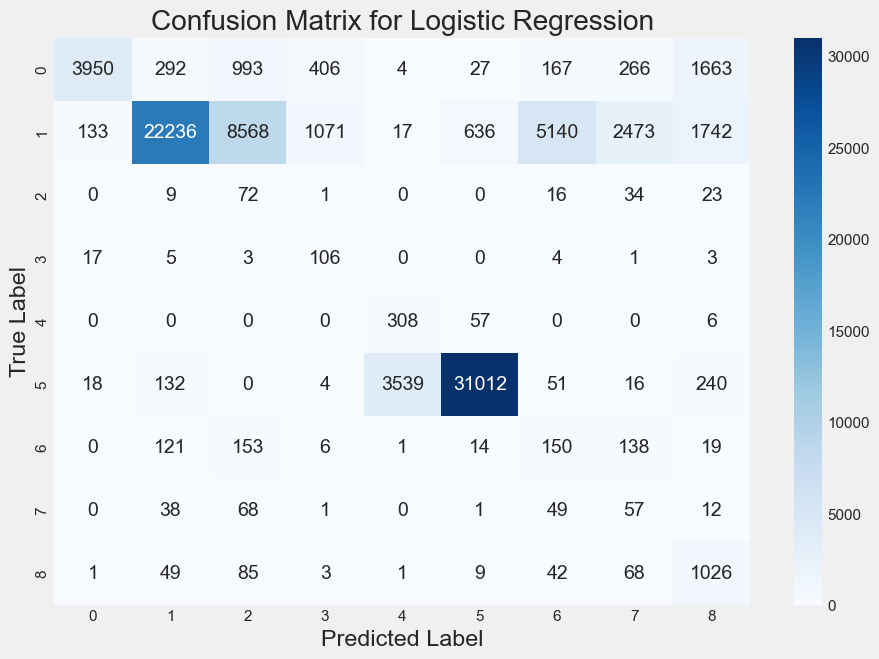

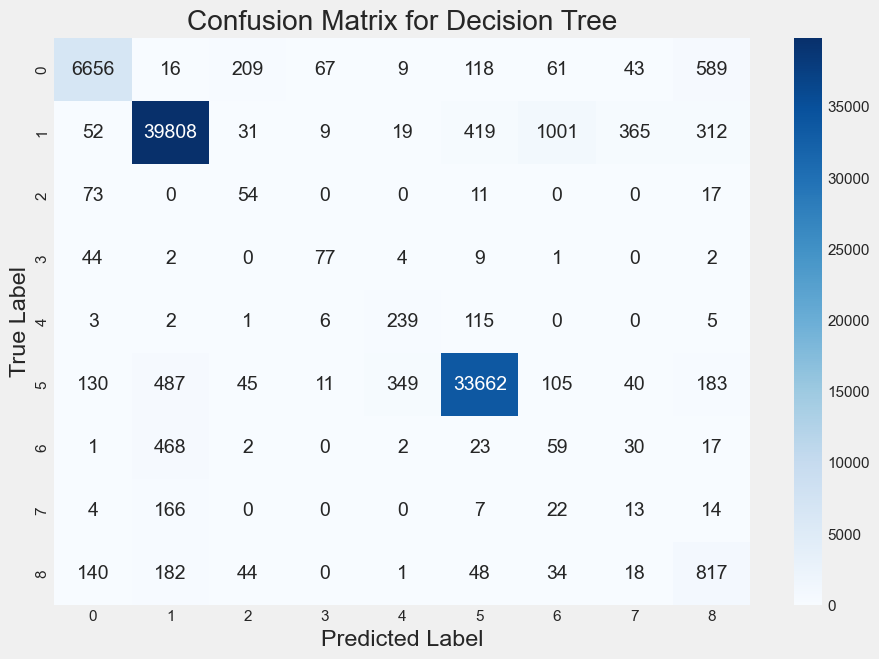

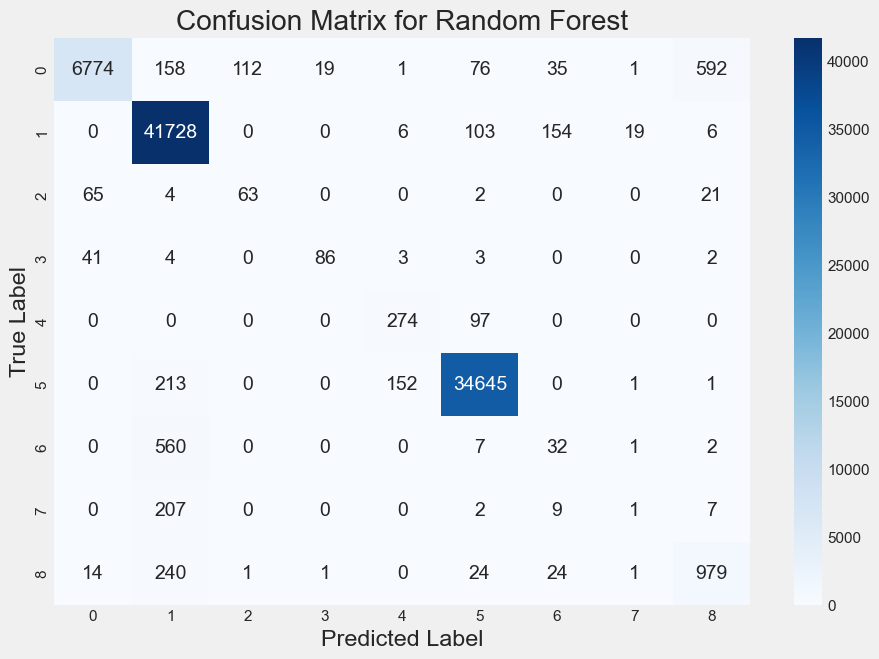

In [ ]:
labels = sorted(y_test.unique())

for model_name, model in models_best.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()